In [2]:
#Implementing Principal Component Analysis Algorithm(PCA)
#This algorithm is reduces the dimension of every row in the input matrix.
#Used for Data Compression, Data Visualization.

#numpy library for mathematical operations.
import numpy as np

In [67]:
#Class PCA = Functions - reduce(), reconvert() and error().
class PCA:
    #matrix to store the eigen vectors, each column is an eigen vector.
    UMat = 0    

    #Input  : Matrix of dimension=m*n, where m=no. of rows, n=no. of columns, k=final dimensions
    #Output : Matrix of dimension=m*k, where m=no. of rows, k=reduces no. of columns. 
    def reduce(self,X,k):
        #get shape of Matrix X.
        shape = X.shape   
        
        #put X into Z
        Z = np.array(X).reshape(shape[0],shape[1])
        
        #transpose of Z matrix
        Zt = np.transpose(Z)
        
        #Covariance Matrix. CM = n*n matrix
        CM = np.matmul(Zt,Z);  
        
        #Singular Value Decomposition of Covariance Matrix. U = n*n matrix. Each column is an eigen vector.
        U,S,V = np.linalg.svd(CM)
        
        #put U into UMat
        self.UMat = U
        
        #UR = U reduced = n*k matrix
        UR = U[:,0:k]
        
        #output Reduced matrix = m*k matrix
        RM = np.matmul(Z,UR)
        return RM

    #function to reconvert the reduced matrix to original matrix.
    # X = m*k matrix
    def reconvert(self,XReduced):
        shape = XReduced.shape
        
        #UR = n*k matrix  i.e k eigen vectors as each column is eigen vector.
        UR = self.UMat[:,0:shape[1]] 
        
        #Transpose of UR = k*n matrix
        UR = np.transpose(U)
        
        #Z = m*n matrix = original matrix. 
        Z = np.matmul(XReduced,UR)
        return Z
    
    #check error between original matrix X and reconverted to original matrix Z 
    #error = mean of (X[i,j] - XRecon[i,j]) for i and j. i.e for all entries.
    def error(self,X,XRecon):
        shape = X.shape
        error = X-XRecon
        error = sum(sum(error))/shape[0]*shape[1]
        return error

In [111]:
#Example X = 1000*10 matrix of random real values between -100 and 100.
X = np.random.uniform(-100,100,10000).reshape(1000,10)
#create PCA object p.
p = PCA() 
#reduce to 1000*2 matrix
Z = p.reduce(X,2)
print("Original Matrix Shape : {0}" .format(X.shape))
print("Reduced Matrix Shape  : {0}".format(Z.shape))

Original Matrix Shape : (1000, 10)
Reduced Matrix Shape  : (1000, 2)


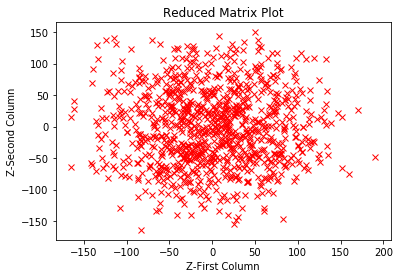

In [113]:
#Plot the reduced matrix.
import matplotlib.pyplot as plt
plt.figure()
plt.plot(Z[:,0],Z[:,1],'rx')
plt.xlabel("Z-First Column")
plt.ylabel("Z-Second Column")
plt.title("Reduced Matrix Plot")
plt.show()

In [114]:
#Convert the Reduced matrix Z to Original.
Y = p.reconvert(Z)
print("Reconverted Matrix Shape : {0}".format(Y.shape))
#check error
err = p.error(X,Y)
print("Error : %f"%err)

Reconverted Matrix Shape : (1000, 10)
Error : -55.003372
